In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("records/Hennepin/HennepinCountyParcels.csv", converters = {"PID": str})

/var/folders/vq/fs6vq8f55gxb0r6f6yps4wt40000gn/T/ipykernel_3426/2146046931.py:1: DtypeWarning: Columns (11,22,23,26,31,40,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("records/Hennepin/HennepinCountyParcels.csv", converters = {"PID": str})


In [3]:
df['PR_TYP_NM1'].value_counts()

PR_TYP_NM1
RESIDENTIAL                      284742
CONDOMINIUM                       45423
TOWNHOUSE                         27138
VACANT LAND-RESIDENTIAL           14264
CONDO GARAGE/MISCELLANEOUS        14185
RESIDENTIAL-TWO UNIT              12391
COMMERCIAL-PREFERRED              10745
APARTMENT                          5235
COOPERATIVE HOUSING                4337
LAND-COMMERCIAL                    3711
COMMON AREA                        3688
RESIDENTIAL-ZERO LOT LINE          3540
INDUSTRIAL-PREFERRED               3201
FARM                               1471
SEASONAL-RESIDENTIAL REC           1295
LOW INCOME RENTAL                  1073
TRIPLEX                             979
LAND - INDUSTRIAL                   903
RAILROAD                            648
VACANT LAND-APARTMENT               489
COMMERCIAL-NON PREFERRED            413
VACANT LAND-RURAL RESIDENTIAL       199
INDUSTRIAL-NON PREFERRED            179
AG PRESERVE                          87
UTILITY                      

In [4]:
df1 = df[df['PR_TYP_NM1'] == 'RESIDENTIAL']

In [5]:
len(df1)

284742

In [6]:
df2 = df1[df1['SALE_DATE'].str.contains("2019|2020|2021|2022|2023|2024")]

In [7]:
df3 = df2[['PID', 'OWNER_NM', 'SALE_DATE']]

In [8]:
df3.reset_index(inplace = True, drop = True)

In [9]:
df3['Year'] = df3['SALE_DATE'].apply(lambda x: x[:4])

/var/folders/vq/fs6vq8f55gxb0r6f6yps4wt40000gn/T/ipykernel_3426/1543027220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = df3['SALE_DATE'].apply(lambda x: x[:4])


In [10]:
df3['Month'] = df3['SALE_DATE'].apply(lambda x: x[-2:])

/var/folders/vq/fs6vq8f55gxb0r6f6yps4wt40000gn/T/ipykernel_3426/438967918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df3['SALE_DATE'].apply(lambda x: x[-2:])


In [11]:
df3.reset_index(inplace = True, drop = True)

In [12]:
df3.drop(['SALE_DATE'], axis = 1, inplace = True)

/var/folders/vq/fs6vq8f55gxb0r6f6yps4wt40000gn/T/ipykernel_3426/1793721898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['SALE_DATE'], axis = 1, inplace = True)


In [13]:
df2019 = df3[df3['Year'] == "2019"]
df2020 = df3[df3['Year'] == "2020"]
df2021 = df3[df3['Year'] == "2021"]
df2022 = df3[df3['Year'] == "2022"]
df2023 = df3[df3['Year'] == "2023"]
df2024 = df3[df3['Year'] == "2024"]

In [14]:
df2019Total = df2019.groupby(df2019['Month'])['OWNER_NM'].count()
df2020Total = df2020.groupby(df2020['Month'])['OWNER_NM'].count()
df2021Total = df2021.groupby(df2021['Month'])['OWNER_NM'].count()
df2022Total = df2022.groupby(df2022['Month'])['OWNER_NM'].count()
df2023Total = df2023.groupby(df2023['Month'])['OWNER_NM'].count()
df2024Total = df2024.groupby(df2024['Month'])['OWNER_NM'].count()

In [15]:
df2019T = pd.DataFrame({"Month": df2019Total.index, "Number of Sales": df2019Total.values})
df2020T = pd.DataFrame({"Month": df2020Total.index, "Number of Sales": df2020Total.values})
df2021T = pd.DataFrame({"Month": df2021Total.index, "Number of Sales": df2021Total.values})
df2022T = pd.DataFrame({"Month": df2022Total.index, "Number of Sales": df2022Total.values})
df2023T = pd.DataFrame({"Month": df2023Total.index, "Number of Sales": df2023Total.values})
df2024T = pd.DataFrame({"Month": df2024Total.index, "Number of Sales": df2024Total.values})

In [16]:
privEq = ["LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP|EQUITY"]

In [17]:
df2019PE = df2019[df2019['OWNER_NM'].str.contains("LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP")]
df2020PE = df2020[df2020['OWNER_NM'].str.contains("LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP")]
df2021PE = df2021[df2021['OWNER_NM'].str.contains("LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP")]
df2022PE = df2022[df2022['OWNER_NM'].str.contains("LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP")]
df2023PE = df2023[df2023['OWNER_NM'].str.contains("LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP")]
df2024PE = df2024[df2024['OWNER_NM'].str.contains("LLC|INC|INCORPORATED|INVESTMENTS|CORPORATION|CORP")]

In [18]:
df2019PETotal = df2019PE.groupby(df2019PE['Month'])['OWNER_NM'].count()
df2020PETotal = df2020PE.groupby(df2020PE['Month'])['OWNER_NM'].count()
df2021PETotal = df2021PE.groupby(df2021PE['Month'])['OWNER_NM'].count()
df2022PETotal = df2022PE.groupby(df2022PE['Month'])['OWNER_NM'].count()
df2023PETotal = df2023PE.groupby(df2023PE['Month'])['OWNER_NM'].count()
df2024PETotal = df2024PE.groupby(df2024PE['Month'])['OWNER_NM'].count()

In [19]:
df2019T['Corp Sales Count'] = df2019PETotal.values
df2020T['Corp Sales Count'] = df2020PETotal.values
df2021T['Corp Sales Count'] = df2021PETotal.values
df2022T['Corp Sales Count'] = df2022PETotal.values
df2023T['Corp Sales Count'] = df2023PETotal.values
df2024T['Corp Sales Count'] = df2024PETotal.values

In [20]:
df2019T['Percentage of Total Sales'] = [round((df2019T['Corp Sales Count'][i]/df2019T['Number of Sales'][i] *100), 2) for i in range(len(df2019T))]
df2020T['Percentage of Total Sales'] = [round((df2020T['Corp Sales Count'][i]/df2020T['Number of Sales'][i] *100), 2) for i in range(len(df2020T))]
df2021T['Percentage of Total Sales'] = [round((df2021T['Corp Sales Count'][i]/df2021T['Number of Sales'][i] *100), 2) for i in range(len(df2021T))]
df2022T['Percentage of Total Sales'] = [round((df2022T['Corp Sales Count'][i]/df2022T['Number of Sales'][i] *100), 2) for i in range(len(df2022T))]
df2023T['Percentage of Total Sales'] = [round((df2023T['Corp Sales Count'][i]/df2023T['Number of Sales'][i] *100), 2) for i in range(len(df2023T))]
df2024T['Percentage of Total Sales'] = [round((df2024T['Corp Sales Count'][i]/df2024T['Number of Sales'][i] *100), 2) for i in range(len(df2024T))]

In [21]:
df2019T['Month'] = df2019T['Month'].apply(lambda x: "2019 " + str(x) if x == "01" else x)
df2020T['Month'] = df2020T['Month'].apply(lambda x: "2020 " + str(x) if x == "01" else x)
df2021T['Month'] = df2021T['Month'].apply(lambda x: "2021 " + str(x) if x == "01" else x)
df2022T['Month'] = df2022T['Month'].apply(lambda x: "2022 " + str(x) if x == "01" else x)
df2023T['Month'] = df2023T['Month'].apply(lambda x: "2023 " + str(x) if x == "01" else x)
df2024T['Month'] = df2024T['Month'].apply(lambda x: "2024 " + str(x) if x == "01" else x)


In [22]:
df = pd.concat([df2019T, df2020T, df2021T, df2022T, df2023T, df2024T], ignore_index = True)

In [23]:
fontdict = {"fontfamily": "Gill Sans", "fontsize": 16}

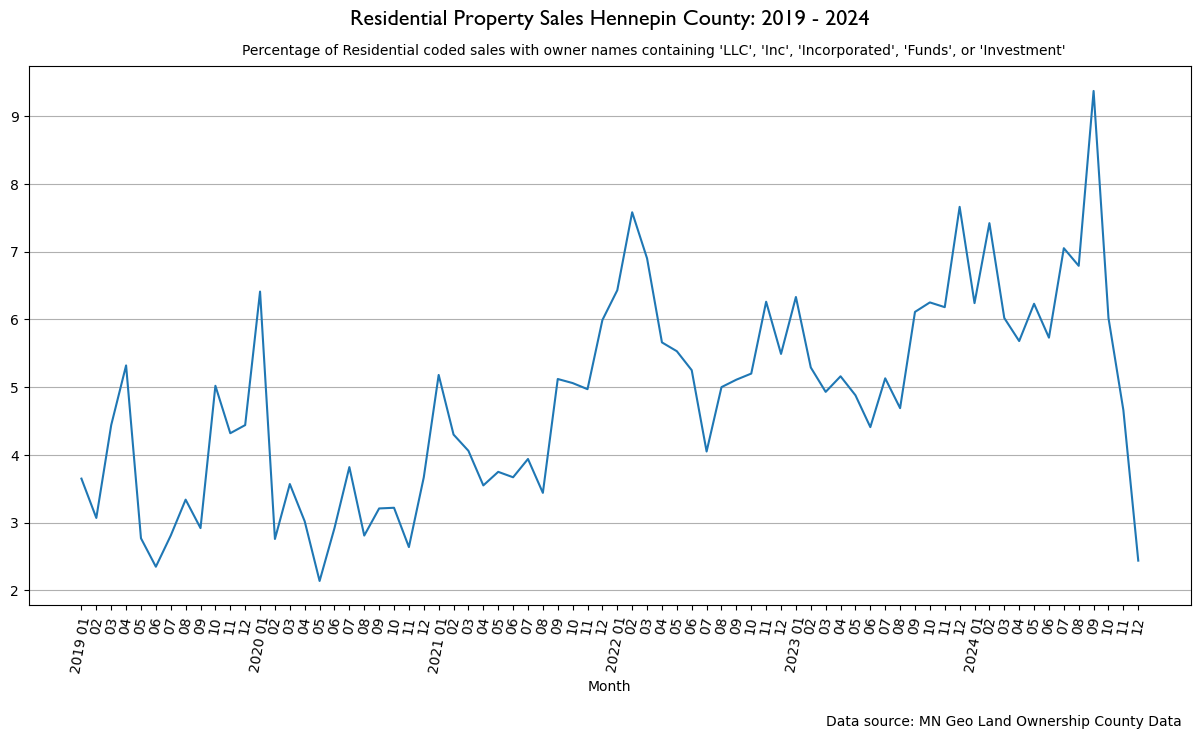

In [24]:

df.plot(kind = 'line', x = 'Month', y = 'Percentage of Total Sales', rot = 80, figsize=(15, 7), legend = False)
plt.xticks(range(len(df['Month'])), df['Month'])
plt.title("Residential Property Sales Hennepin County: 2019 - 2024", pad = 30, **fontdict)
plt.text(x = 10.8, y = 9.9, s = "Percentage of Residential coded sales with owner names containing 'LLC', 'Inc', 'Incorporated', 'Funds', or 'Investment'")
plt.text(x = 50.0, y = 0, s = "Data source: MN Geo Land Ownership County Data")
plt.grid(axis = 'y')
plt.show()